# Scopt example

In [1]:
from modelgym.models import CtBClassifier, XGBClassifier, LGBMClassifier
from modelgym.utils import ModelSpace
from skopt.space import Integer, Categorical, Real
from sklearn.datasets import make_classification
from modelgym.utils import XYCDataset
from modelgym.trainers import SkoptTrainer
from modelgym.report import Report
from modelgym.metrics import Accuracy, RocAuc
from hyperopt import hp
from hyperopt.pyll.base import scope
import pandas as pd
import math

## Parameter spaces

You could define parameters as a list of **skopt spaces** 

```python
xgboost_space = [
    Integer(low=0, high=50, name='max_depth'),
]
```
or as a dictionary of **hyperopt spaces**

```python
xgboost_space = {
    'max_depth': scope.int(hp.quniform('max_depth', 0, 50, 1)),
}
```

## Fixed parameters

* To **fix parameters** use Categorical with one category for skopt

```python
xgboost_space = [
    Categorical([10], name='max_depth'),
]
```
and just a value for hyperopt

```python
xgboost_space = {
    'max_depth': 10,
}
```

In [2]:
xgboost_space = [
    Real(low=0.01, high=1.0, prior='log-uniform', name='learning_rate'),
    Integer(low=0, high=5, name='min_child_weight'),
    Integer(low=0, high=50, name='max_depth'),
    Integer(low=0, high=20, name='max_delta_step'),
    Real(low=0.01, high=1.0, prior='subsample', name='uniform'),
    Real(low=0.01, high=1.0, prior='uniform', name='colsample_bytree'),
    Real(low=0.01, high=1.0, prior='uniform', name='colsample_bylevel'),
    Real(low=1e-9, high=1000, prior='log-uniform', name='reg_lambda'),
    Real(low=1e-9, high=1000, prior='log-uniform', name='reg_alpha'),
    Real(low=1e-9, high=0.5, prior='log-uniform', name='gamma'),
    Integer(low=50, high=100, name='n_estimators'),
    Real(low=1e-6, high=500, prior='log-uniform', name='scale_pos_weight'),
]
xgboost_model = ModelSpace(XGBClassifier,
                   space=xgboost_space,
                   space_update=False)

In [3]:
catboost_space = [
    Integer(low=100, high=101, name='iterations'),
    Integer(low=1, high=11, name='depth'),
    Real(low=math.exp(-5), high=1e-1, prior='log-uniform', name='learning_rate'),
    Real(low=0.01, high=1, prior='uniform', transform='identity', name='rsm'),
    Categorical(categories=('Newton', 'Gradient'), prior=None, name='leaf_estimation_method'),
    Integer(low=1, high=10, name='l2_leaf_reg'),
    Real(low=0, high=2, prior='uniform', transform='identity', name='bagging_temperature')
]
catboost_model = ModelSpace(CtBClassifier,
                   space=catboost_space,
                   space_update=False)

In [4]:
models = [
    catboost_model,
    xgboost_model,
]

## Get dataset

A dataset could be XYCDataset, pd.DataFrame or path to .csv file.

Toy dataset

In [5]:
X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_classes=2)
dataset = XYCDataset(X, y)

In [6]:
# X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_classes=2)
# dataset = pd.DataFrame(data=X)
# dataset['y'] = y
# dataset.head()

## Create a Skopt Trainer

In [7]:
trainer = SkoptTrainer(models)

## Optimize hyperparams

Of course, it will take some time.

In [8]:
%%time
trainer.crossval_optimize_params(Accuracy(), dataset, metrics=[Accuracy(), RocAuc()])

/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


CPU times: user 8min 2s, sys: 6min 4s, total: 14min 6s
Wall time: 2min 23s


{'CtBClassifier': {'loss': -0.9200831847890671,
  'metric_cv_results': [{'accuracy': 0.9117647058823529,
    'roc_auc': 0.9965277777777778},
   {'accuracy': 0.8484848484848485, 'roc_auc': 0.8713235294117648},
   {'accuracy': 1.0, 'roc_auc': 1.0}],
  'params': {'bagging_temperature': 1.8950285362775698,
   'depth': 6,
   'iterations': 101,
   'l2_leaf_reg': 1,
   'leaf_estimation_method': 'Gradient',
   'learning_rate': 0.006935757578326401,
   'rsm': 0.0982421310032911}},
 'XGBClassifier': {'loss': -0.890374331550802,
  'metric_cv_results': [{'accuracy': 0.8529411764705882,
    'roc_auc': 0.9340277777777778},
   {'accuracy': 0.8181818181818182, 'roc_auc': 0.8455882352941178},
   {'accuracy': 1.0, 'roc_auc': 1.0}],
  'params': {'colsample_bylevel': 0.9900329099865245,
   'colsample_bytree': 0.5892000837093083,
   'gamma': 0.00823876170998929,
   'learning_rate': 0.037690887286278764,
   'max_delta_step': 8,
   'max_depth': 9,
   'min_child_weight': 1,
   'n_estimators': 59,
   'reg_alph

In [9]:
trainer.get_best_results()

{'CtBClassifier': {'model_space': <modelgym.utils.model_space.ModelSpace at 0x7f41b353c1d0>,
  'result': {'loss': -0.9200831847890671,
   'metric_cv_results': [{'accuracy': 0.9117647058823529,
     'roc_auc': 0.9965277777777778},
    {'accuracy': 0.8484848484848485, 'roc_auc': 0.8713235294117648},
    {'accuracy': 1.0, 'roc_auc': 1.0}],
   'params': {'bagging_temperature': 1.8950285362775698,
    'depth': 6,
    'iterations': 101,
    'l2_leaf_reg': 1,
    'leaf_estimation_method': 'Gradient',
    'learning_rate': 0.006935757578326401,
    'rsm': 0.0982421310032911}}},
 'XGBClassifier': {'model_space': <modelgym.utils.model_space.ModelSpace at 0x7f41b353c9b0>,
  'result': {'loss': -0.890374331550802,
   'metric_cv_results': [{'accuracy': 0.8529411764705882,
     'roc_auc': 0.9340277777777778},
    {'accuracy': 0.8181818181818182, 'roc_auc': 0.8455882352941178},
    {'accuracy': 1.0, 'roc_auc': 1.0}],
   'params': {'colsample_bylevel': 0.9900329099865245,
    'colsample_bytree': 0.58920

## Report best results

In [10]:
reporter = Report(trainer.get_best_results(), dataset, [Accuracy(), RocAuc()])

### Report in text form

In [11]:
reporter.print_all_metric_results()


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    accuracy    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                           tuned
CtBClassifier  0.920083 (+3.34%)
XGBClassifier  0.890374 (+0.00%)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    roc_auc    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                           tuned
CtBClassifier  0.955950 (+3.17%)
XGBClassifier  0.926539 (+0.00%)


### Report plots


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    accuracy    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



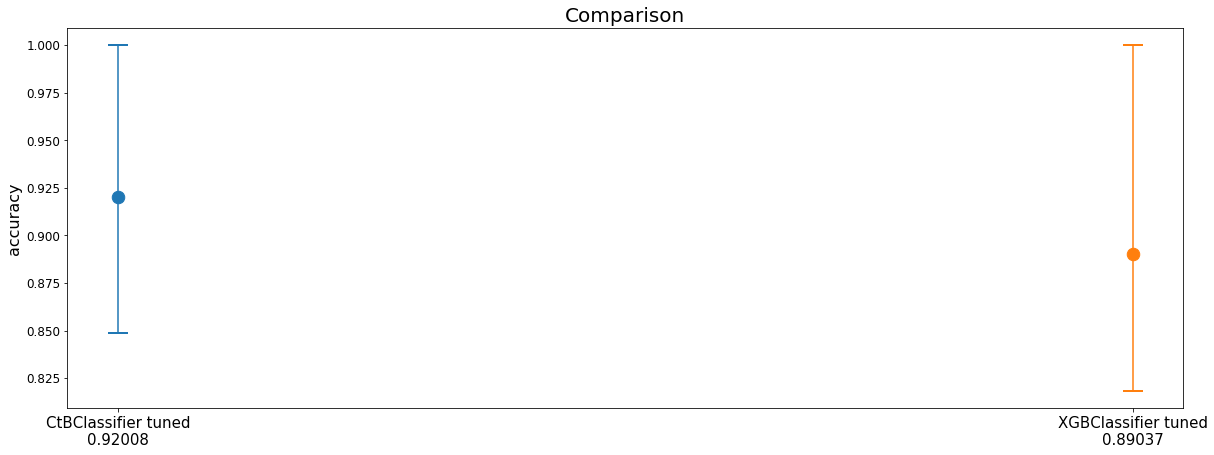


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    roc_auc    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



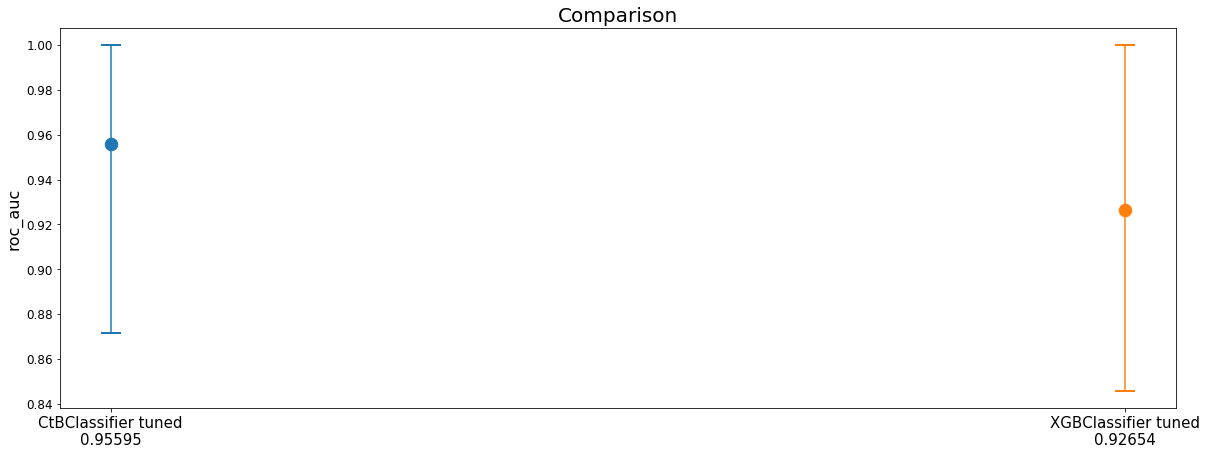

In [12]:
reporter.plot_all_metrics()

### Report heatmaps for each metric


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    accuracy    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



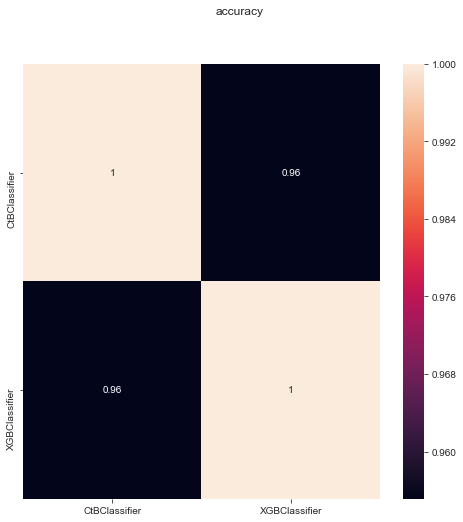


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    roc_auc    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



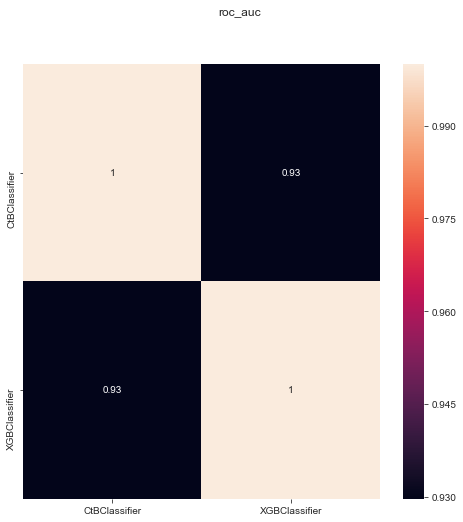

In [13]:
reporter.plot_heatmaps()

That's it! 

If you like it, please follow the advanced tutorial and learn all features modelgym can provide.